# Análisis exploratorio


In [71]:
#librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#cargar datos
datos = pd.read_csv('db.csv', sep= ';', encoding= 'latin1', dtype= {'INTENSIDAD': 'float', 'TIPO DE ODIO': 'string', 'TONO HUMORISTICO': 'string', 'MODIFICADOR': 'string' })


In [73]:

print('Nombre de las columnas:\n', datos.columns)
print('\nTipos de datos:\n', datos.dtypes)
print('\nDimensiones de los datos: ', datos.shape)
print('\nValores ausentes:\n', datos.isnull().sum())




Nombre de las columnas:
 Index(['MEDIO', 'SOPORTE', 'URL', 'TIPO DE MENSAJE', 'CONTENIDO A ANALIZAR',
       'INTENSIDAD', 'TIPO DE ODIO', 'TONO HUMORISTICO', 'MODIFICADOR',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

Tipos de datos:
 MEDIO                           object
SOPORTE                         object
URL                             object
TIPO DE MENSAJE                 object
CONTENIDO A ANALIZAR            object
INTENSIDAD                     float64
TIPO DE ODIO            string[python]
TONO HUMORISTICO        string[python]
MODIFICADOR             string[python]
Unnamed: 9                     float64
Unnamed: 10                    float64
Unnamed: 11                    float64
Unnamed: 12                    float64
Unnamed: 13                    float64
Unnamed: 14                    float64
Unnamed: 15                    float64
dtype: object

Dimensiones de los datos:  (

**Observaciones:**
* El conjunto de datos tiene 575.029 instancias.
* Disponemos de 16 variables, de las cuales las 7 últimas no tienen datos y 3 de ellas escasa información

## Análisis de la columna MEDIO

In [74]:
frecuencias = datos.value_counts('MEDIO')
histograma_frecuencias = frecuencias.value_counts().sort_index()
histograma_frecuencias.name = "Frecuencia"
df_histograma_frecuencias = histograma_frecuencias.reset_index()
df_histograma_frecuencias.columns = ["Apariciones", "Número de valores de MEDIO"]
print(df_histograma_frecuencias)



    Apariciones  Número de valores de MEDIO
0             1                          90
1             2                           8
2             3                           4
3             4                           5
4             5                           7
5             6                           6
6             7                           6
7            11                           2
8         11848                           1
9         13057                           1
10        34700                           1
11        37145                           1
12        64454                           1
13       130470                           1
14       130890                           1
15       152192                           1


Como podemos ver, hay 90 valores de la variable 'MEDIO' que sólo aparecen una vez; posiblemente sean valores erróneos. Viendo lel histograma de frecuencias, parece lógico descartar los valores cuya frecuencia sea inferior a 1.000

In [75]:
frecuencias = datos.value_counts('MEDIO')
valores_a_eliminar = frecuencias[frecuencias<1000].index
newDatos = datos[~datos["MEDIO"].isin(valores_a_eliminar)]

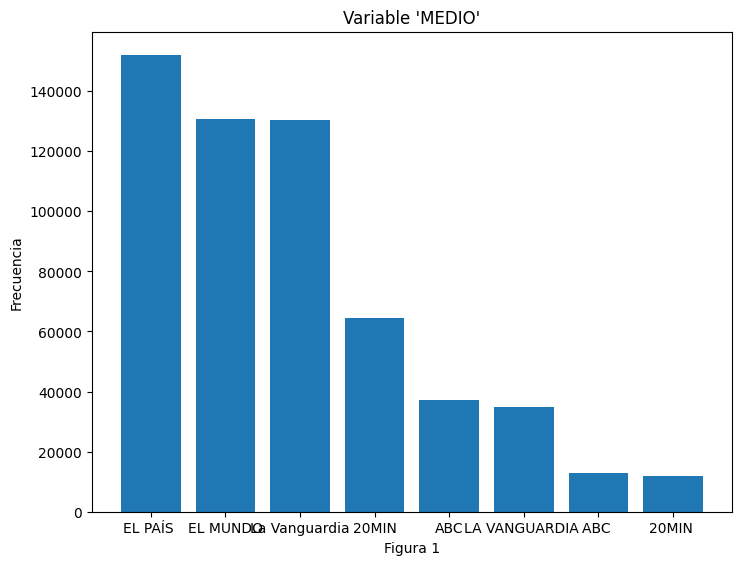

In [76]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['MEDIO'])
freq =newDatos.value_counts('MEDIO')
ejes.bar(valores,freq)
ejes.set_title("Variable 'MEDIO'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()

En el gráfico se puede observar que aparentemente hay valores repetidos. Analicemos los valores que hay:

In [77]:
pd.unique(newDatos['MEDIO'])

array(['EL PAÍS ', 'EL MUNDO', 'La Vanguardia', '20MIN', 'ABC',
       'LA VANGUARDIA ', 'ABC ', '20MIN '], dtype=object)

Se puede ver que hay valores repetidos con espacios al final y alguno (como "La vanguardia" que aparece en mayúsculas y también en minúsculas). Debemos tratarlos igual, así que eliminamos los espacios del final y pasamos la columnas a mayúsculas. A continuación repetimos el gráfico:

In [78]:
newDatos.loc[:,"MEDIO"] = newDatos["MEDIO"].str.strip().str.upper()

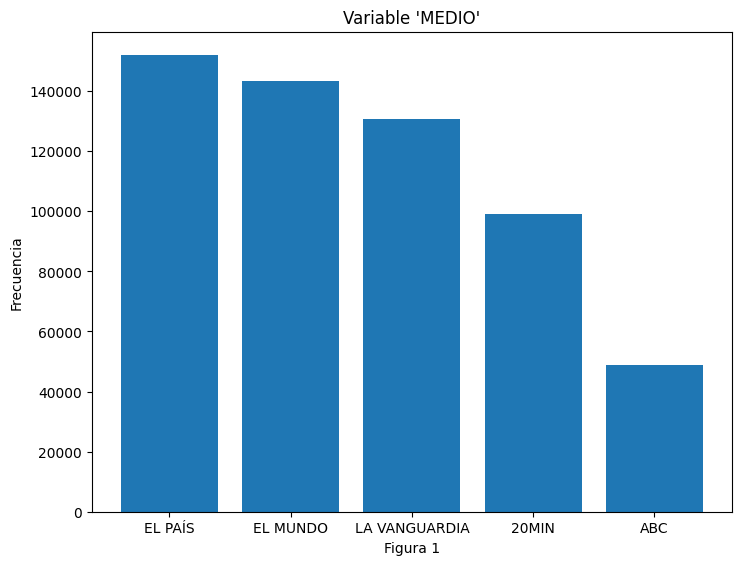

In [79]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['MEDIO'])
freq =newDatos.value_counts('MEDIO')
ejes.bar(valores,freq)
ejes.set_title("Variable 'MEDIO'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()

En este gráfico se aprecia que el medio con más comentarios es "El País" con más de 140.000 instancias y el medio con menos representación en el ABC con menos de 60.000 instancias.

## Análisis de la columna SOPORTE

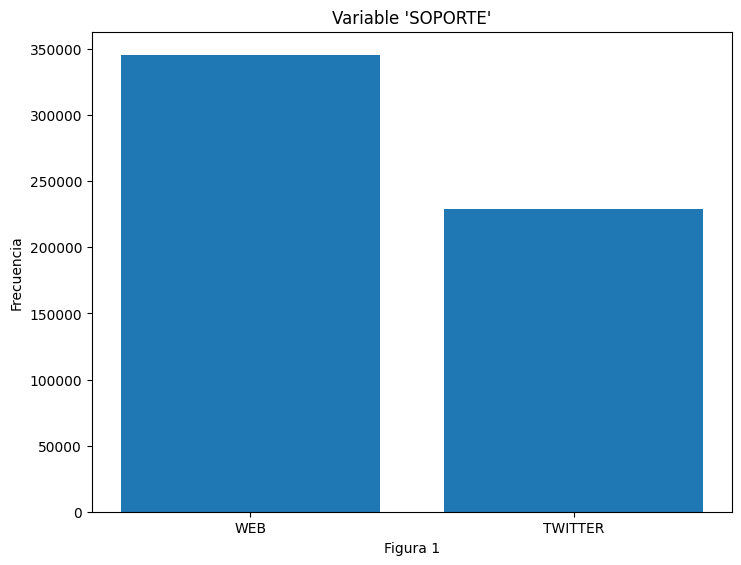

In [80]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['SOPORTE'])
freq =newDatos.value_counts('SOPORTE')
ejes.bar(valores,freq)
ejes.set_title("Variable 'SOPORTE'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()

La variable soporte tiene 2 valores diferentes (Web y Twitter).

## Análisis de la columna TIPO DE MENSAJE

In [81]:
valores

array(['WEB', 'TWITTER'], dtype=object)

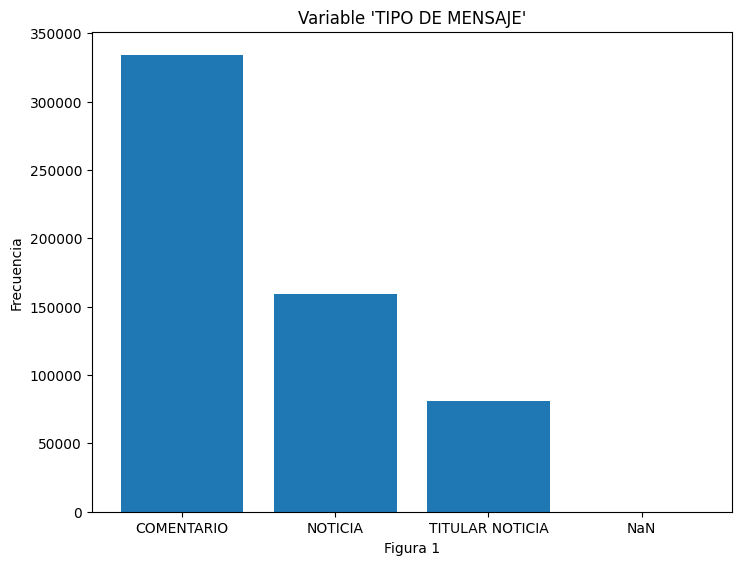

In [82]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['TIPO DE MENSAJE'].fillna('NaN'))
freq =newDatos.fillna('NaN').value_counts('TIPO DE MENSAJE')
ejes.bar(valores,freq)
ejes.set_title("Variable 'TIPO DE MENSAJE'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()

Podemos ver que en la variable TIPO DE MENSAJE hay esencialemnte comentarios, noticias y titulares. Algunas instancias no tienen valor para esta variable. Las eliminamos para tener el conjunto de datos depurado.

In [83]:
newDatos = newDatos.dropna(subset=["TIPO DE MENSAJE"])

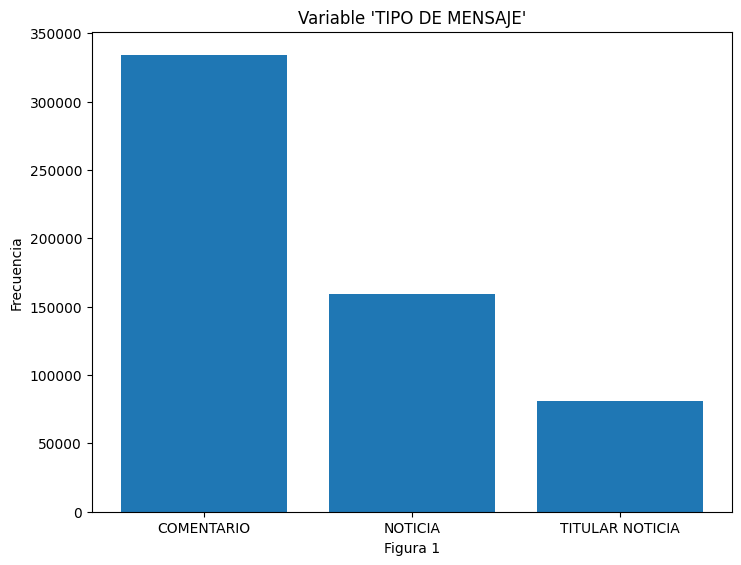

In [84]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['TIPO DE MENSAJE'].fillna('NaN'))
freq =newDatos.fillna('NaN').value_counts('TIPO DE MENSAJE')
ejes.bar(valores,freq)
ejes.set_title("Variable 'TIPO DE MENSAJE'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()

## Análisis de la columna INTENSIDAD

<Axes: >

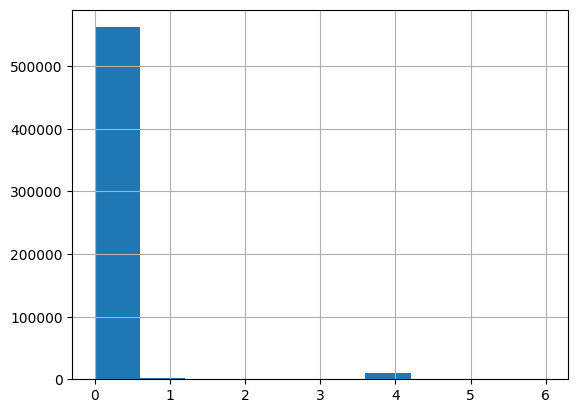

In [85]:
newDatos["INTENSIDAD"].hist()

In [86]:
frecuencias =newDatos['INTENSIDAD'].value_counts(normalize=True)*100
print(frecuencias)

INTENSIDAD
0.0    97.860185
4.0     1.805513
1.0     0.239633
5.0     0.036719
3.0     0.029932
2.0     0.025756
6.0     0.002262
Name: proportion, dtype: float64


Podemos observar que la variable INTENSIDAD tiene valores entre 0 y 6; pero la inmensa mayoria de las instancias tienen un cero (el 97.9% de ellas). Por tanto, el valor 0 no parece significativo

## Análisis de la columna TIPO DE ODIO

In [87]:
frecuencia = datos["TIPO DE ODIO"].fillna('NaN').value_counts(normalize=True) * 100
print(frecuencia)

TIPO DE ODIO
NaN                             97.862195
Otros                            1.564617
Ideológico                       0.299289
Xenofobia                        0.062432
Otros, Misoginia                 0.045911
                                  ...    
Otros, Ideológico, Misoginia     0.000174
Otros, Misoginia, Racismo        0.000174
Otros, Xenofobia, Misoginia      0.000174
Otros, Religioso                 0.000174
Otros, Sexual, Ideológico        0.000174
Name: proportion, Length: 73, dtype: Float64


In [88]:
anaDatos = newDatos["TIPO DE ODIO"].str.split(",").explode()
porcentaje = anaDatos.value_counts() / len(newDatos) * 100
print(porcentaje)

TIPO DE ODIO
Otros           1.657402
Ideológico      0.326226
Xenofobia       0.077250
 Misoginia      0.055850
 Ideológico     0.050108
Misoginia       0.038277
 Otros          0.029230
Sexual          0.021748
Racismo         0.014441
 Sexual         0.008873
 Xenofobia      0.008351
 Racismo        0.006785
Religioso       0.002262
 Religioso      0.002262
ideológico      0.000522
misoginia       0.000348
xenofobia       0.000174
otros           0.000174
 misoginia      0.000174
 Ideológico     0.000174
Name: count, dtype: float64


## Análisis de la columna TONO HUMORÍSTICO

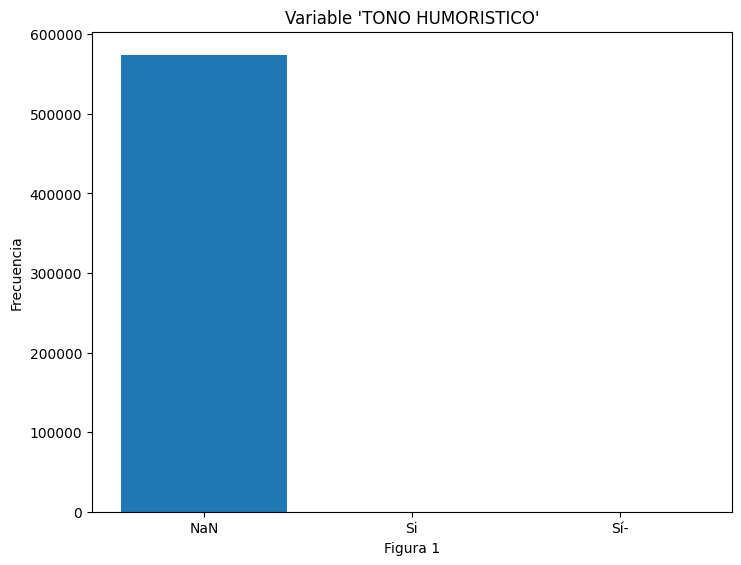

In [89]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['TONO HUMORISTICO'].fillna('NaN'))
freq =newDatos.fillna('NaN').value_counts('TONO HUMORISTICO')
ejes.bar(valores,freq)
ejes.set_title("Variable 'TONO HUMORISTICO'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()

Se pued observar que mayoritariamente no hay datos en esta columna y pocos valores con "Si". Se puede interpretar que los valores ausentes en realidad no tienen tono humorístico; por tanto cambiamos los valores ausentes a "No" y unificamos los valores "Si"

In [90]:
newDatos["TONO HUMORISTICO"] = newDatos['TONO HUMORISTICO'].fillna('No')
newDatos["TONO HUMORISTICO"] = newDatos['TONO HUMORISTICO'].replace("Sí\xad", "Si")

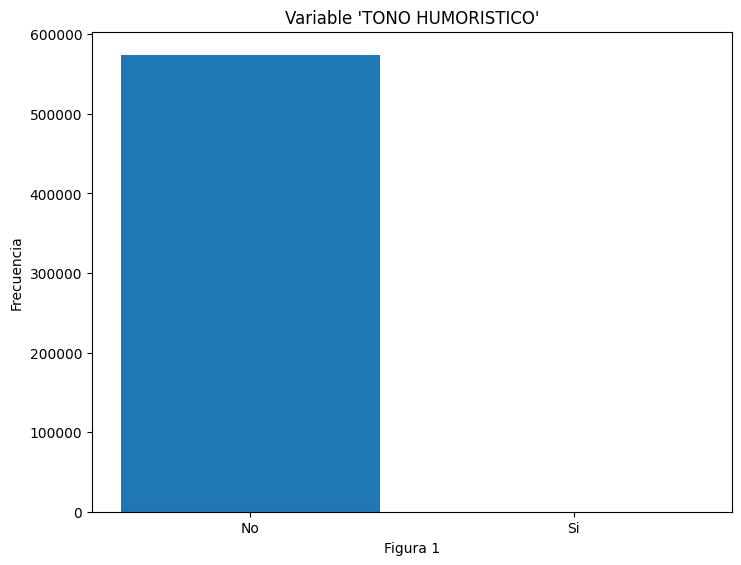

In [91]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['TONO HUMORISTICO'].fillna('NaN'))
freq =newDatos.fillna('NaN').value_counts('TONO HUMORISTICO')
ejes.bar(valores,freq)
ejes.set_title("Variable 'TONO HUMORISTICO'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()

## Análisis de la columna MODIFICADOR

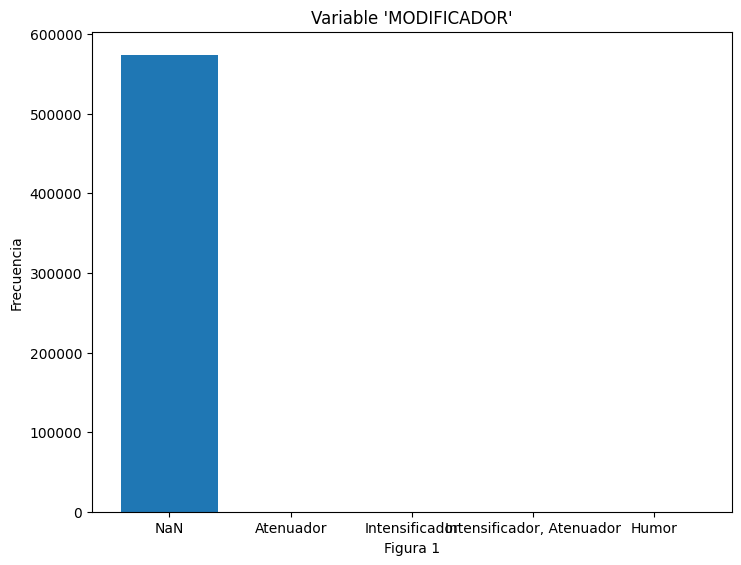

In [92]:
figura = plt.figure()
ejes = figura.add_axes([0,0,1,1])
valores = pd.unique(newDatos['MODIFICADOR'].fillna('NaN'))
freq =newDatos.fillna('NaN').value_counts('MODIFICADOR')
ejes.bar(valores,freq)
ejes.set_title("Variable 'MODIFICADOR'")
ejes.set_ylabel("Frecuencia")
ejes.set_xlabel("Figura 1")
plt.show()